In [ ]:
# Gerekli kütüphaneleri yükle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Veritabanını oku
veritabani = pd.read_csv('productpriceindex.csv')

In [ ]:
# Veritabanındaki başlıkların isimlerini tanımlıyoruz
productname = veritabani.columns[0]
date = veritabani.columns[1]
farmprice = veritabani.columns[2]
atlantaretail = veritabani.columns[3]
chicagoretail = veritabani.columns[4]
losangelesretail = veritabani.columns[5]
newyorkretail = veritabani.columns[6]
averagespread = veritabani.columns[7]

# '$' işaretini temizleme, boşlukları temizleme ve sayısal formata çevirme
veritabani[farmprice] = veritabani[farmprice].str.replace('[\$,]', '').str.strip()
veritabani[atlantaretail] = veritabani[atlantaretail].str.replace('[\$,]', '').str.strip()
veritabani[chicagoretail] = veritabani[chicagoretail].str.replace('[\$,]', '').str.strip()
veritabani[losangelesretail] = veritabani[losangelesretail].str.replace('[\$,]', '').str.strip()
veritabani[newyorkretail] = veritabani[newyorkretail].str.replace('[\$,]', '').str.strip()

# Boşluk karakterlerini NaN ile değiştirme
veritabani.replace('', pd.NA, inplace=True)

# Sayısal formata çevirme
veritabani[farmprice] = pd.to_numeric(veritabani[farmprice], errors='coerce')
veritabani[atlantaretail] = pd.to_numeric(veritabani[atlantaretail], errors='coerce')
veritabani[chicagoretail] = pd.to_numeric(veritabani[chicagoretail], errors='coerce')
veritabani[losangelesretail] = pd.to_numeric(veritabani[losangelesretail], errors='coerce')
veritabani[newyorkretail] = pd.to_numeric(veritabani[newyorkretail], errors='coerce')

# Tarih olduğunu belirtme
veritabani[date] = pd.to_datetime(veritabani[date])

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Yüzde değerini sayıya çevirme

veritabani['averagespread'] = veritabani['averagespread'].replace('[\%,]', '', regex=True).astype('float')

In [ ]:
# Veritabanı hakkında bilgiler
print("Veri Tabanı İnceleme:")
print(veritabani.info())

Veri Tabanı İnceleme:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   productname          15766 non-null  object        
 1   date                 15766 non-null  datetime64[ns]
 2   farmprice            15765 non-null  float64       
 3   atlantaretail        15765 non-null  float64       
 4   chicagoretail        15766 non-null  float64       
 5   losangelesretail     15766 non-null  float64       
 6   newyorkretail        15758 non-null  float64       
 7   averagespread        15766 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 985.5+ KB
None


In [ ]:
# Veritabanı hakkında bilgiler
print("Veri Tabanı İnceleme:")
print(veritabani.info())


Verilerin İlk 5 Satırı:
   productname         date         farmprice   atlantaretail   \
0  Strawberries         2019-05-19        1.16            2.23   
1  Romaine Lettuce      2019-05-19        0.35            1.72   
2  Red Leaf Lettuce     2019-05-19        0.32            1.84   
3  Potatoes             2019-05-19        1.50            5.32   
4  Oranges              2019-05-19        0.41            1.42   

   chicagoretail   losangelesretail   newyorkretail   averagespread  
0            1.70               1.99            2.54          82.33  
1            2.00               1.69            1.99         428.57  
2            1.84               1.69            1.89         467.19  
3            5.14               3.99            6.22         244.50  
4            1.45               1.34            2.05         281.71  


In [ ]:
# Kaç adet veri olduğunu bulma
print("\nToplam Veri Sayısı:", len(veritabani))


Toplam Veri Sayısı: 15766


In [ ]:
# Eksik verileri kontrol etme
print("\nEksik Veri Kontrolü:")
print(veritabani.isnull().sum())


Eksik Veri Kontrolü:
productname            0
date                   0
farmprice              1
atlantaretail          1
chicagoretail          0
losangelesretail       0
newyorkretail          8
averagespread          0
dtype: int64


In [ ]:
# Eksik verileri doldurma (örnek olarak ortalama ile dolduruldu)
veritabani.fillna(veritabani.mean(), inplace=True)

<ipython-input-10-60da5b3f27a6>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  veritabani.fillna(veritabani.mean(), inplace=True)
<ipython-input-10-60da5b3f27a6>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  veritabani.fillna(veritabani.mean(), inplace=True)


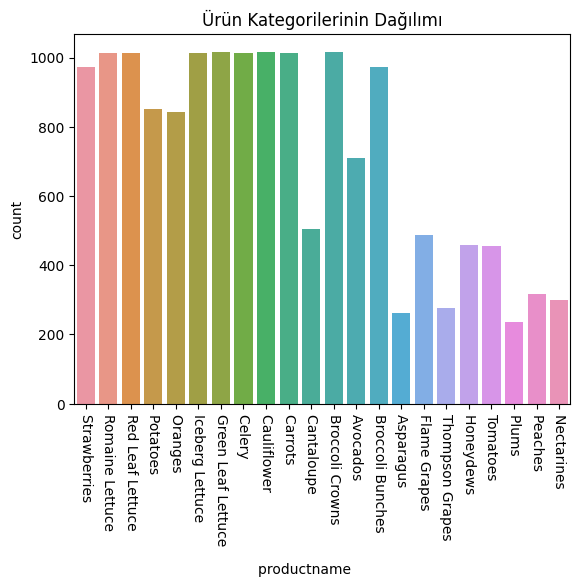

In [ ]:
# Sorgular ve görselleştirmeler

# 1. Ürün kategorilerinin dağılımı
sns.countplot(x=productname, data=veritabani)
plt.xticks(rotation=-90)
plt.title('Ürün Kategorilerinin Dağılımı')
plt.show()

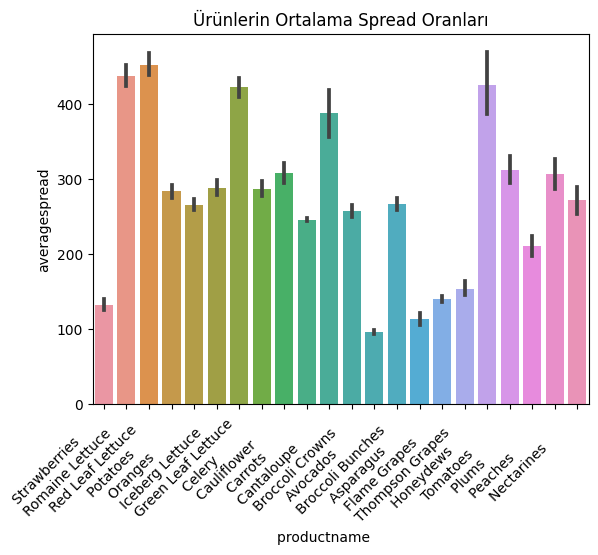

In [ ]:
# 2. Ürünlerin ortalama spread oranları
sns.barplot(x=productname, y=averagespread, data=veritabani)
plt.title('Ürünlerin Ortalama Spread Oranları')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 3. En yüksek spread oranına sahip ürün
max_spread_product = veritabani.loc[veritabani[averagespread].idxmax()]
print("\nEn Yüksek Spread Oranına Sahip Ürün:")
print(max_spread_product)


En Yüksek Spread Oranına Sahip Ürün:
productname            Red Leaf Lettuce   
date                   2004-06-20 00:00:00
farmprice                             0.19
atlantaretail                         1.09
chicagoretail                         1.27
losangelesretail                       0.8
newyorkretail                        41.49
averagespread                       5775.0
Name: 12013, dtype: object


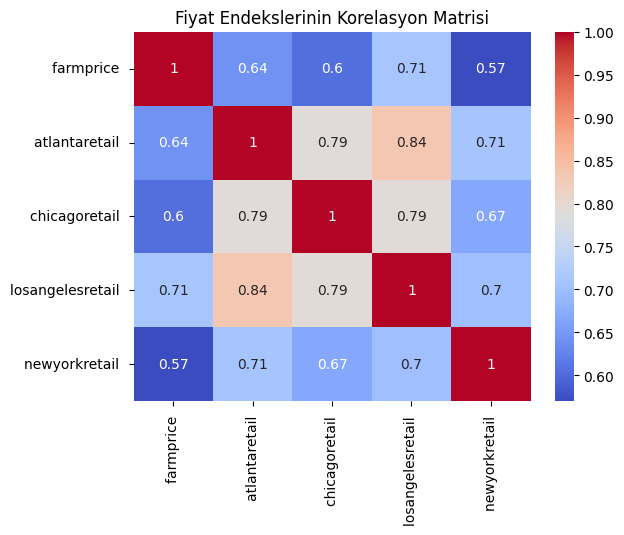

In [ ]:
# 4. Ürün fiyat endekslerinin korelasyon matrisi
correlation_matrix = veritabani[[farmprice, atlantaretail, chicagoretail, losangelesretail, newyorkretail]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Fiyat Endekslerinin Korelasyon Matrisi')
plt.show()

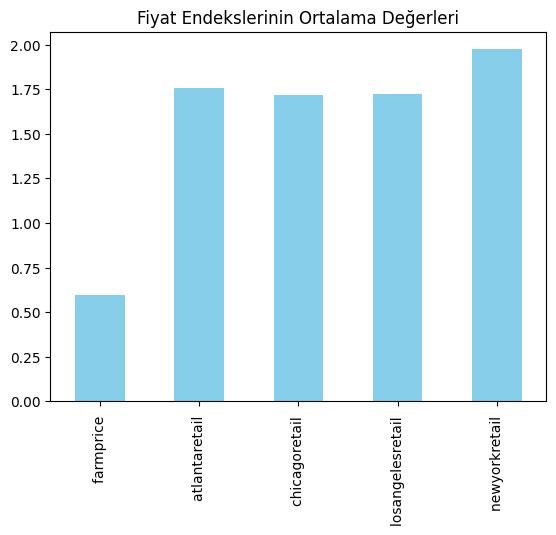

In [ ]:
# 5. Fiyat endekslerinin ortalama değerleri
avg_prices = veritabani[[farmprice, atlantaretail, chicagoretail, losangelesretail, newyorkretail]].mean()
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Fiyat Endekslerinin Ortalama Değerleri')
plt.show()

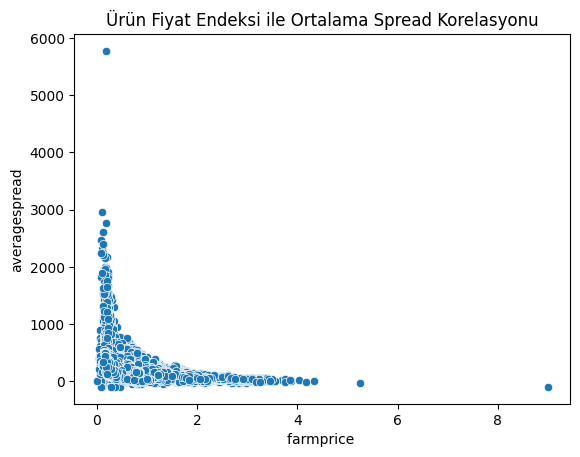

In [ ]:
# 6. Ürün fiyat endeksleri ile ortalama spread arasındaki korelasyon
sns.scatterplot(x=farmprice, y=averagespread, data=veritabani)
plt.title('Ürün Fiyat Endeksi ile Ortalama Spread Korelasyonu')
plt.show()

In [ ]:
# 7. En yüksek spread oranına sahip şehir
max_spread_city = veritabani[[atlantaretail, chicagoretail, losangelesretail, newyorkretail]].mean().idxmax()
print("\nEn Yüksek Spread Oranına Sahip Şehir:")
print(max_spread_city)


En Yüksek Spread Oranına Sahip Şehir:
newyorkretail 


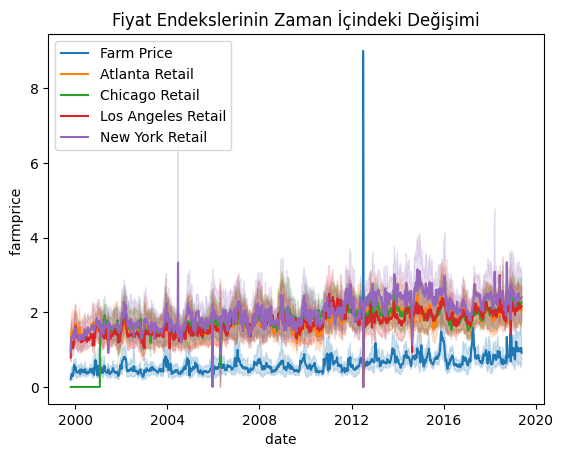

In [ ]:
# 8. Fiyat endekslerinin zaman içindeki değişimi
veritabani[date] = pd.to_datetime(veritabani[date])
sns.lineplot(x=date, y=farmprice, data=veritabani, label='Farm Price')
sns.lineplot(x=date, y=atlantaretail, data=veritabani, label='Atlanta Retail')
sns.lineplot(x=date, y=chicagoretail, data=veritabani, label='Chicago Retail')
sns.lineplot(x=date, y=losangelesretail, data=veritabani, label='Los Angeles Retail')
sns.lineplot(x=date, y=newyorkretail, data=veritabani, label='New York Retail')
plt.title('Fiyat Endekslerinin Zaman İçindeki Değişimi')
plt.show()

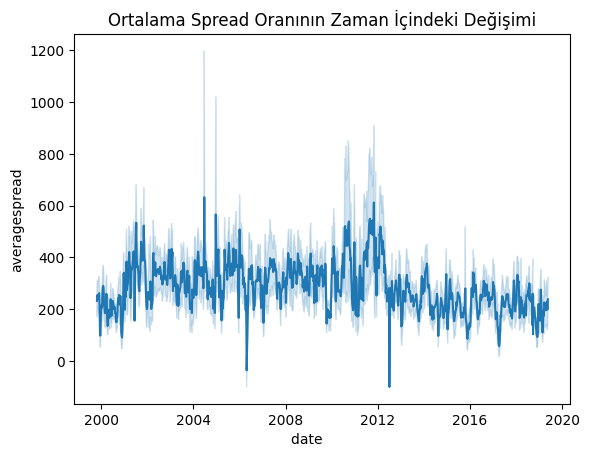

In [ ]:
# 9. Spread oranının zaman içindeki değişimi
sns.lineplot(x=date, y=averagespread, data=veritabani)
plt.title('Ortalama Spread Oranının Zaman İçindeki Değişimi')
plt.show()


In [ ]:
# 10. En düşük spread oranına sahip ürün
min_spread_product = veritabani.loc[veritabani[averagespread].idxmin()]
print("\nEn Düşük Spread Oranına Sahip Ürün:")
print(min_spread_product)


En Düşük Spread Oranına Sahip Ürün:
productname            Asparagus          
date                   2012-07-02 00:00:00
farmprice                              9.0
atlantaretail                          0.0
chicagoretail                          0.0
losangelesretail                       0.0
newyorkretail                          0.0
averagespread                       -100.0
Name: 5286, dtype: object


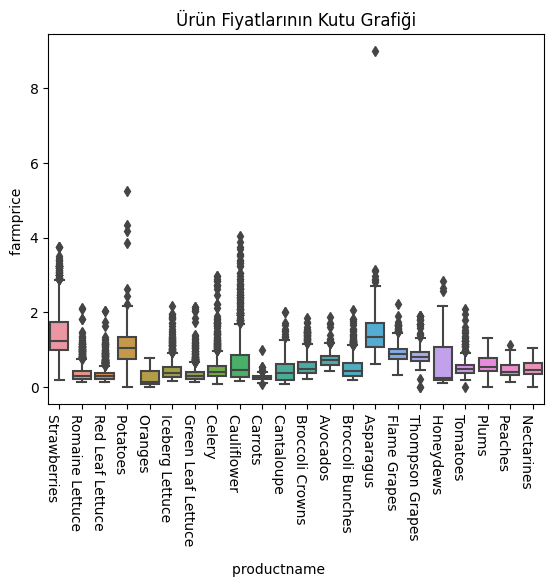

In [ ]:
# 11. Ürün fiyatlarının kutu grafiği
sns.boxplot(x=productname, y=farmprice, data=veritabani)
plt.title('Ürün Fiyatlarının Kutu Grafiği')
plt.xticks(rotation=-90, ha='right')
plt.show()

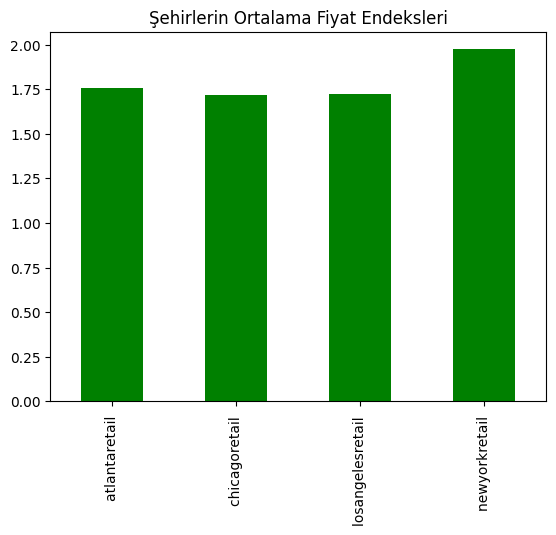

In [ ]:
# 12. Şehirlerin ortalama fiyat endeksleri
avg_city_prices = veritabani[[atlantaretail, chicagoretail, losangelesretail, newyorkretail]].mean()
avg_city_prices.plot(kind='bar', color='green')
plt.title('Şehirlerin Ortalama Fiyat Endeksleri')
plt.show()

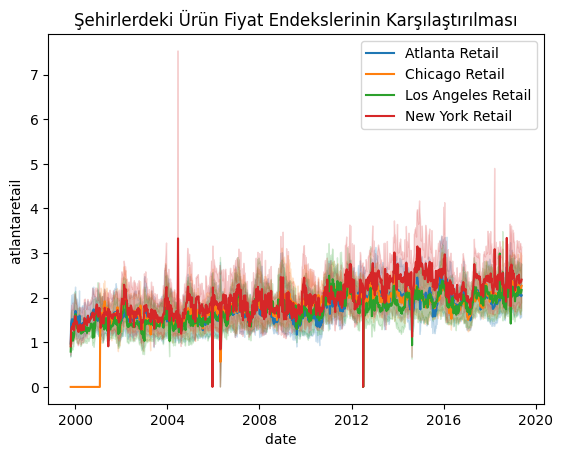

In [ ]:
# 13. Şehirlerdeki ürünlerin fiyat endekslerinin karşılaştırılması
sns.lineplot(x=date, y=atlantaretail, data=veritabani, label='Atlanta Retail')
sns.lineplot(x=date, y=chicagoretail, data=veritabani, label='Chicago Retail')
sns.lineplot(x=date, y=losangelesretail, data=veritabani, label='Los Angeles Retail')
sns.lineplot(x=date, y=newyorkretail, data=veritabani, label='New York Retail')
plt.title('Şehirlerdeki Ürün Fiyat Endekslerinin Karşılaştırılması')
plt.show()

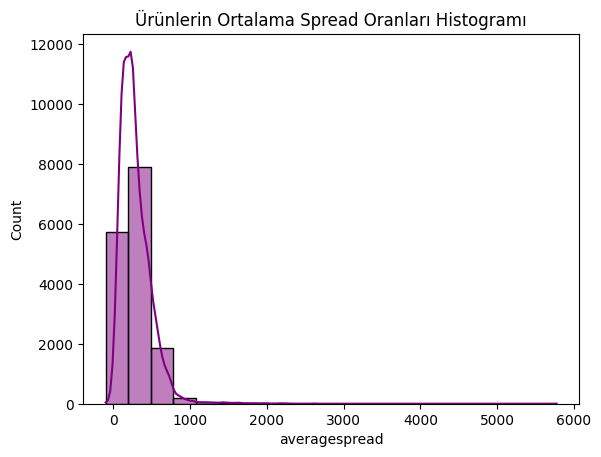

In [ ]:
# 14. Ürünlerin ortalama spread oranları histogramı
sns.histplot(veritabani[averagespread], bins=20, kde=True, color='purple')
plt.title('Ürünlerin Ortalama Spread Oranları Histogramı')
plt.show()

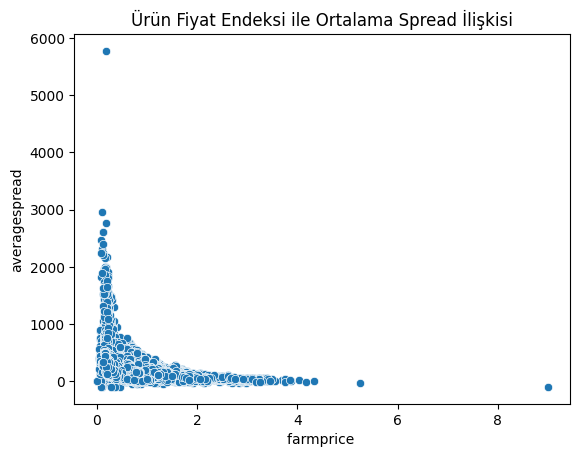

In [ ]:
# 15. Ürün fiyat endeksleri ile ortalama spread arasındaki ilişkiyi gösteren scatter plot
sns.scatterplot(x=farmprice, y=averagespread, data=veritabani)
plt.title('Ürün Fiyat Endeksi ile Ortalama Spread İlişkisi')
plt.show()

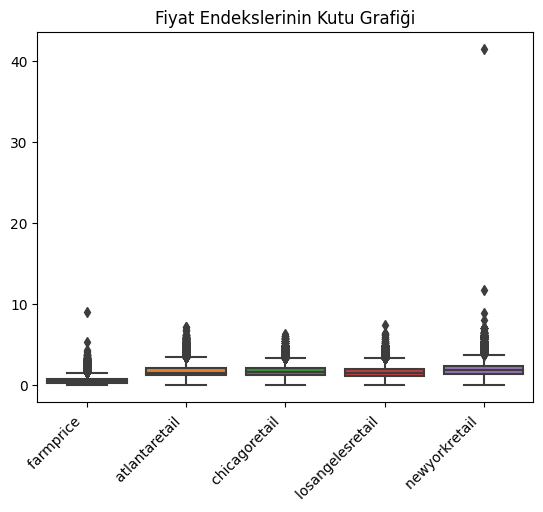

In [ ]:
# 16. Fiyat endekslerinin kutu grafiği
sns.boxplot(data=veritabani[[farmprice, atlantaretail, chicagoretail, losangelesretail, newyorkretail]])
plt.title('Fiyat Endekslerinin Kutu Grafiği')
plt.xticks(rotation=45, ha='right')
plt.show()

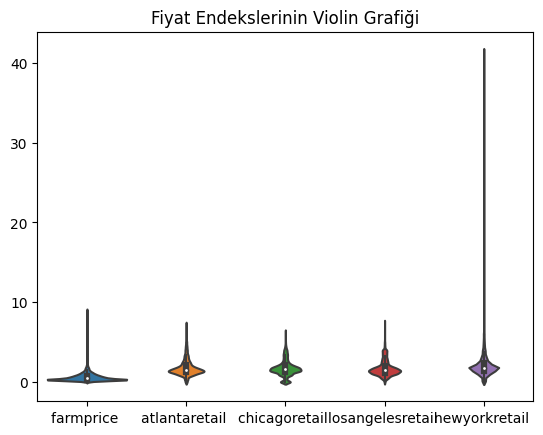

In [ ]:
# 17. Fiyat endekslerinin violin grafiği
sns.violinplot(data=veritabani[[farmprice, atlantaretail, chicagoretail, losangelesretail, newyorkretail]])
plt.title('Fiyat Endekslerinin Violin Grafiği')
plt.show()